In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from scipy.optimize import curve_fit

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/learning/Factors3.csv"

In [ ]:
data_df = pd.read_csv(path)
print(data_df.isnull().sum())

Year                                        0
Manufacturing, value added (% of GDP)       0
Gdp per capita                              0
Rural population (% of total population)    0
Urban Population                            0
Inflation                                   0
Export                                      0
dtype: int64


More than 3 factors were used to predict GDP per capita so one more factor Export were added subsequently to improve accuracy

In [ ]:
data_df

,Year,"Manufacturing, value added (% of GDP)",Gdp per capita,Rural population (% of total population),Urban Population,Inflation,Export
0,1960,14.75012,82.18860,82.076,17.924,1.780,4.463156
1,1961,15.35384,85.35430,81.968,18.032,1.700,4.303586
2,1962,15.86330,89.88176,81.782,18.218,3.630,4.168975
3,1963,15.75239,101.12640,81.595,18.405,2.985,4.280503
4,1964,14.85074,115.53750,81.405,18.595,13.360,3.725551
...,...,...,...,...,...,...,...
57,2017,15.01824,1980.66700,66.400,33.600,3.330,18.791765
58,2018,14.88153,1996.91500,65.970,34.030,3.940,19.927829
59,2019,13.47362,2100.75100,65.530,34.470,3.730,18.690983
60,2020,13.68339,1927.70800,65.074,34.926,6.620,18.708899


In [ ]:
print(data_df.dtypes)

Year                                          int64
Manufacturing, value added (% of GDP)       float64
Gdp per capita                              float64
Rural population (% of total population)    float64
Urban Population                            float64
Inflation                                   float64
Export                                      float64
dtype: object


Rural population (% of total population) was removed as Urban population(%) is equal to 100-Rural population (% of total population) so it doesn't make sense to use both as there is very high correlationt. Below cell divides data into test and train and subsequent cell removes year from data used and train on it

In [ ]:
X=data_df.copy()
X=X.drop(["Gdp per capita","Rural population (% of total population)"],axis=1)
y=data_df["Gdp per capita"]
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=104, test_size=0.25,shuffle=True)
print(np.shape(X_train))
print(np.shape(y_train))
print(X_train.dtypes,y_train.dtypes)

(46, 5)
(46,)
Year                                       int64
Manufacturing, value added (% of GDP)    float64
Urban Population                         float64
Inflation                                float64
Export                                   float64
dtype: object float64


In [ ]:
ct_train=X_train.Year
ct_test=X_test.Year
from sklearn.decomposition import PCA
pca = PCA(0.95)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train=X_train.drop(columns = ['Year'])
X_test=X_test.drop(columns = ['Year'])

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(np.shape(X_train))
print(np.shape(y_train))
# print(X_train.dtype,y_train.dtype)

(46, 3)
(46,)


Linear Regression Model with r2 score=0.7677
This model performed poorly so as a result 4 more models were implemented subsequently Random forest Regressor, Decision Tree Regressor, Deep Neural Network and Polynomial Regression(degree=2)

In [ ]:
X_train

array([[ 0.48052187, -0.32060056, -0.47965927],
       [-0.8019433 ,  0.33339017, -1.5969497 ],
       [-0.57037752,  0.56986758,  0.05618959],
       [-0.77314214,  1.54382067,  0.06239863],
       [-1.67942975, -0.34477015, -0.6615106 ],
       [-0.63442287,  0.56858337, -0.10170351],
       [-0.36517905,  0.85062426, -0.33382102],
       [-1.6191882 , -1.12156562,  0.5377461 ],
       [-0.8745955 , -1.61741544, -2.38607753],
       [ 2.09672136,  0.41823084,  0.11075989],
       [ 0.24061124, -0.73878597,  0.12116399],
       [-0.74172822,  0.55783009, -0.35299881],
       [ 2.02180907, -0.61679018,  0.57919693],
       [-0.04323355,  0.00603817, -0.19377062],
       [-1.47648194, -0.49495318,  0.27777224],
       [ 1.64527461,  0.82826172, -1.14632591],
       [-1.71534381, -0.31317007,  1.25698824],
       [ 1.7944743 , -1.08680008,  0.17356103],
       [ 1.66282802,  1.40797941, -0.3413551 ],
       [ 1.60973714,  0.60341682, -0.75998761],
       [ 1.34427892, -0.29249226, -0.436

In [ ]:
y_train

40     443.31420
18     205.69340
28     354.14920
21     270.47060
2       89.88176
27     340.41680
30     367.55660
10     112.43450
16     161.09210
51    1458.10400
39     441.99880
22     274.11130
54    1573.88600
33     301.15900
12     122.98190
46     806.75330
6       89.99730
57    1980.66700
49    1101.96100
47    1028.33500
45     714.86100
15     158.03620
31     303.05560
9      107.62230
56    1732.55400
17     186.21350
43     546.72660
61    2256.59400
53    1449.61000
34     346.10300
58    1996.91500
55    1605.60500
0       82.18860
3      101.12640
13     143.77870
59    2100.75100
35     373.76650
48     998.52230
36     399.95010
8       99.87596
24     276.66800
38     413.29890
14     163.47810
25     296.43520
1       85.35430
5      119.31890
Name: Gdp per capita, dtype: float64

In [ ]:
regr=LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_train,y_train))

0.8958819378566811


In [ ]:
y_pred = regr.predict(X_test)
y_pred
mean_squared_error(y_pred,y_test,squared=False)

252.04565204120667

In [ ]:
# model4=np.poly1d(np.polyfit(,y_test,4))
# polyline=np.linspace(1,15,20)
# plt.scatter(ct_test,y_test)
# plt.plot(polyline,model4(polyline),'--',color='red')
# plt.show()


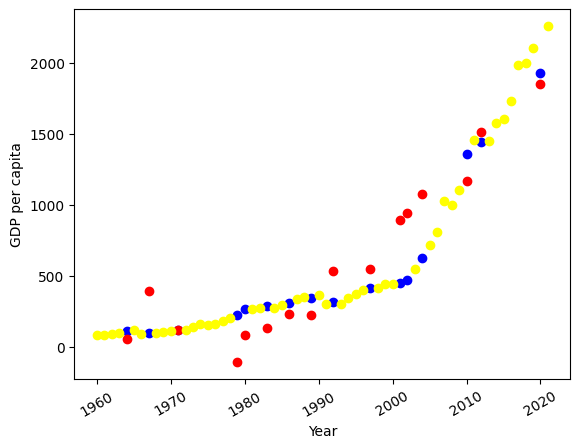

In [ ]:
plt.scatter(ct_test, y_test, color ='blue')#shows test data points with actual value of GDP
plt.scatter(ct_test, y_pred, color='red')#shows test data points with PREDICTED VALUE OF GDP
plt.scatter(ct_train,y_train,color='yellow')#SHOWS TRAIN DATA POINTS
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.xticks(rotation=30)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7677681870999598

Random Forest Regressor Model  starts here

Below cell is implemented with a loop to find best value of n_estimators

In [ ]:
from sklearn.ensemble import RandomForestRegressor
prevscore=0
n_count_estimators=0
for i in range(1,45):
  regressorRandom = RandomForestRegressor(n_estimators = i, random_state = 104)
  regressorRandom.fit(X_train, y_train)
  y_forest_predict=regressorRandom.predict(X_test)
  score=r2_score(y_test, y_forest_predict)
  if score>prevscore:
    prevscore=score
    n_count_estimators=i
print( n_count_estimators)



6


In [ ]:
regressorRandom = RandomForestRegressor(n_estimators = 6, random_state = 104)
regressorRandom.fit(X_train, y_train)
y_forest_predict=regressorRandom.predict(X_test)
score=r2_score(y_test, y_forest_predict)
score

0.9947197533167935

In [ ]:
print(y_forest_predict)
print(mean_squared_error(y_forest_predict,y_test,squared=False))

[1371.31688333  411.40781667   97.0479      326.4668      291.06143333
  613.5584      217.09638333  294.99956667  101.62326     477.1273
 2031.2905      134.23815     529.27196667  286.5516     1456.63783333
  328.6024    ]
38.00541331709831


In [ ]:
print(y_test)

50    1357.56400
37     415.49380
7       96.33914
29     346.11290
23     291.23810
44     627.77420
20     266.57790
26     310.46590
11     118.60320
41     451.57300
60    1927.70800
4      115.53750
42     470.98680
19     224.00100
52    1443.88200
32     316.95390
Name: Gdp per capita, dtype: float64


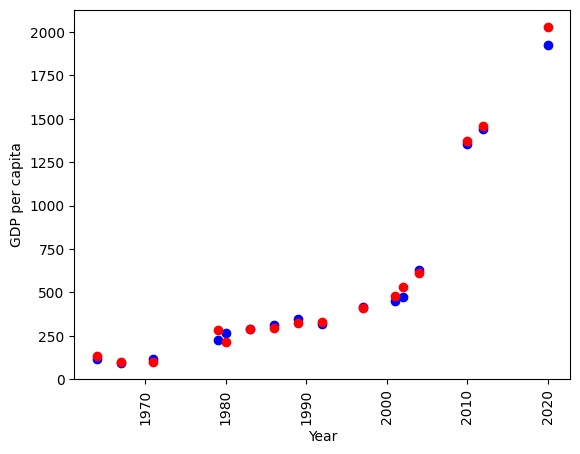

In [ ]:
plt.scatter(ct_test, y_test, color ='blue')
plt.scatter(ct_test, y_forest_predict, color='red')
# plt.scatter(ct_train,y_train,color='yellow')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)
plt.show()

In [ ]:
r2_score(y_test, y_forest_predict)

0.9947197533167935

Polynomial Regression Starts

Function for calculating y=w0*x1+w1*(x1^2)+w2*(x2^1)+w2*(x2^2).............+b

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
X_poly=poly.fit_transform(X_train)
poly.fit(X_poly,y_train)
linear=LinearRegression()
linear.fit(X_poly,y_train)

LinearRegression()

In [ ]:
y_poly_pred = linear.predict(poly.fit_transform(X_test))
y_poly_pred
mean_squared_error(y_poly_pred,y_test,squared=False)

160.69155574121038

In [ ]:
r2_score(y_test, y_poly_pred)

0.9056049103274056

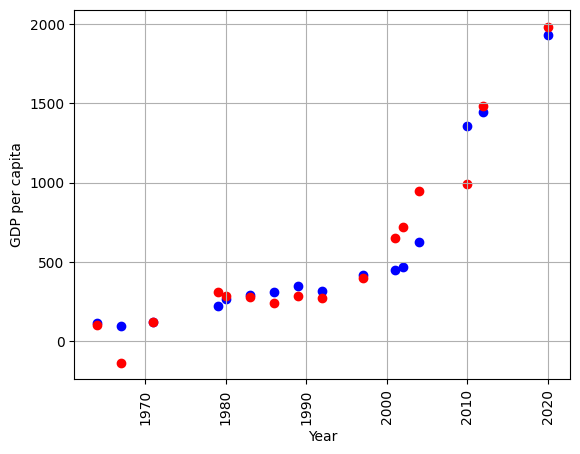

In [ ]:
plt.scatter(ct_test, y_test, color ='blue')
plt.scatter(ct_test, y_poly_pred, color='red')
# plt.scatter(ct_train,y_train,color='yellow')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Deep Neural Network model starts

With the model as defined below with 100 epochs

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="linear",),
        keras.layers.Dense(50, activation="linear", ),
        keras.layers.Dense(20, activation="linear"),
        keras.layers.Dense(1,activation="linear")
    ]
)



In [ ]:
custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=custom_optimizer,loss='mean_absolute_error')
X_train_tens = tf.convert_to_tensor(X_train)
y_train_tens=tf.convert_to_tensor(y_train)
model.fit(X_train_tens,y_train_tens,epochs=100)

In [ ]:
y_nn_pred=model.predict(X_test)
y_nn_pred

1/1 [==============================] - 0s 181ms/step


array([[1158.385   ],
       [ 565.4246  ],
       [ 276.47775 ],
       [ 292.89496 ],
       [ 205.1639  ],
       [1007.37494 ],
       [ 164.34264 ],
       [ 265.31018 ],
       [  97.13392 ],
       [ 815.6202  ],
       [1605.1006  ],
       [  51.235607],
       [ 868.88416 ],
       [  38.080463],
       [1409.3784  ],
       [ 526.9636  ]], dtype=float32)

In [ ]:
r2_score(y_test, y_nn_pred)

0.8307404780544091

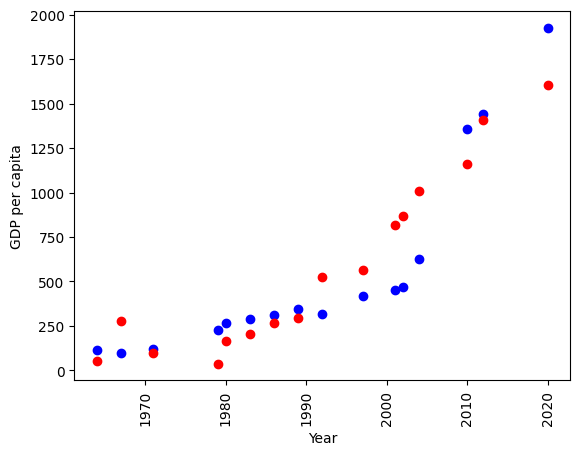

In [ ]:
plt.scatter(ct_test, y_test, color ='blue')
plt.scatter(ct_test, y_nn_pred, color='red')
# plt.scatter(ct_train,y_train,color='yellow')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)
plt.show()

Decision Tree Regressor Starts from Here

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressordec = DecisionTreeRegressor(random_state = 0)
regressordec.fit(X_train, y_train)
y_reg_predict=regressordec.predict(X_test)


In [ ]:
y_reg_predict

array([1101.961 ,  399.9501,   89.9973,  367.5566,  340.4168,  714.861 ,
        205.6934,  340.4168,  101.1264,  441.9988, 2100.751 ,   89.9973,
        546.7266,  296.4352, 1449.61  ,  303.0556])

In [ ]:
r2_score(y_test, y_reg_predict)

0.97192385358908

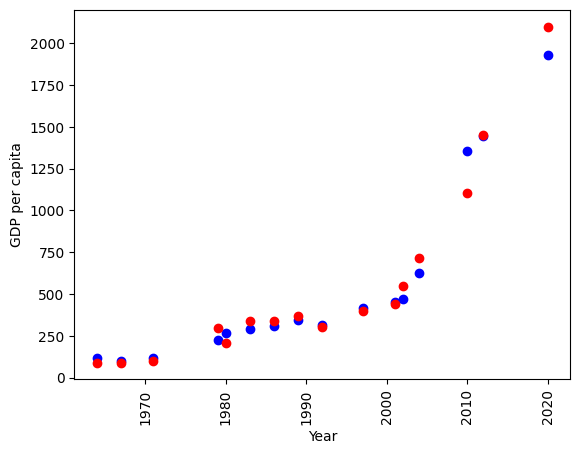

In [ ]:
plt.scatter(ct_test, y_test, color ='blue')
plt.scatter(ct_test, y_reg_predict, color='red')
# plt.scatter(ct_train,y_train,color='yellow')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.xticks(rotation=90)
plt.show()

Here we conclude the programming part with 5 models namely(ranked on basis of performance):



*   Random Forest Regresssor
*   Decision Tree Regressor
*   Polynomial Regression
*   Deep Neural Network
*   Linear Regression





Random Forest Regressor was pretty successful in predicting values but linear rfegression couldn't fit well with r2 score of merely 0.76